# BATTLE OF THE NEGHBORHOODS

## importing libraries

In [1]:
import numpy as np # library to handle data in a vectorized manner
! pip install geocoder
! pip install geopy
! pip install BeautifulSoup4
!pip install folium
import pandas as pd # library for data analsysis
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

import json # library to handle JSON files

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import geocoder # to get coordinates

import requests # library to handle requests
# library to parse HTML and XML documents

from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

print("Libraries imported.")

     |████████████████████████████████| 102kB 11.2MB/s ta 0:00:01
     |████████████████████████████████| 102kB 10.2MB/s ta 0:00:01
Libraries imported.


In [2]:
! pip install beautifulsoup4
from bs4 import BeautifulSoup

import folium

In [3]:
# use the inline backend to generate the plots within the browser
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.0.2


In [4]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

from pandas.io.json import json_normalize
import requests

In [5]:
address = 'La Carolina, Quito, Ecuador'

geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Quito home are {}, {}.'.format(latitude, longitude))

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: DeprecationWarning: Using Nominatim with the default "geopy/1.18.1" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  app.launch_new_instance()


The geograpical coordinate of Quito home are -0.1831335, -78.4844205.


# Quito, Ecuador

In [6]:
KSU_LATITUDE = -0.1831335
KSU_LONGITUDE = -78.4844205
print('The geograpical coordinates of Quito are {}, {}.'.format(KSU_LATITUDE, KSU_LONGITUDE))

The geograpical coordinates of Quito are -0.1831335, -78.4844205.


## IMPORTING FOLIUM MAP OF THE LOCATION OF DOWNTOWN QUITO

In [7]:

ksu_map = folium.Map(location = [KSU_LATITUDE, KSU_LONGITUDE], zoom_start = 15)
folium.Marker([KSU_LATITUDE, KSU_LONGITUDE]).add_to(ksu_map)

ksu_map

In [8]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [9]:
limit= 100 
radius= 2000

## Foursquare API

In [10]:
# @hidden_cell
CLIENT_ID = 'E2DPU0TK2QPK54OMTSAYVQXEIWZBXKKC31GCMACS53PL03UF' # your Foursquare ID
CLIENT_SECRET = 'CEXLZYR2GTBRT1DME2STYLMETRBHPMGMUJNQEXUXJUWICF4X' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: E2DPU0TK2QPK54OMTSAYVQXEIWZBXKKC31GCMACS53PL03UF
CLIENT_SECRET:CEXLZYR2GTBRT1DME2STYLMETRBHPMGMUJNQEXUXJUWICF4X


In [11]:
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(CLIENT_ID, 
                                                                        CLIENT_SECRET, 
                                                                        VERSION, 
                                                                        KSU_LATITUDE, 
                                                                        KSU_LONGITUDE, 
                                                                        radius,
                                                                        limit)
                                                            
url           

'https://api.foursquare.com/v2/venues/explore?&client_id=E2DPU0TK2QPK54OMTSAYVQXEIWZBXKKC31GCMACS53PL03UF&client_secret=CEXLZYR2GTBRT1DME2STYLMETRBHPMGMUJNQEXUXJUWICF4X&v=20180605&ll=-0.1831335,-78.4844205&radius=2000&limit=100'

In [12]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5f1852485dc8d450a14dfa82'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Parque la Carolina',
  'headerFullLocation': 'Parque la Carolina, Quito',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 131,
  'suggestedBounds': {'ne': {'lat': -0.165133481999982,
    'lng': -78.46645399831846},
   'sw': {'lat': -0.201133518000018, 'lng': -78.50238700168154}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4dbc4730a86e0e98a1df41ff',
       'name': 'Parque La Carolina',
       'location': {'address': 'Av. de los Shirys & Av. Rio Amazonas',
        'crossStreet': 'Av. NN.UU. & Av. Eloy Alfaro',
        'lat': -0.18350569823489743,
    

## IMPORTING THE DATA FRAME

In [13]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues

,name,categories,lat,lng
0,Parque La Carolina,Park,-0.183506,-78.484440
1,Corfú,Ice Cream Shop,-0.181578,-78.481249
2,Cosa Nostra Trattoria,Italian Restaurant,-0.184815,-78.480762
3,Lucía Pie House & Grill,Pie Shop,-0.183717,-78.481240
4,Europa Café,Coffee Shop,-0.183643,-78.480667
5,Chicberry,Ice Cream Shop,-0.181021,-78.480118
6,Cyril,Dessert Shop,-0.183930,-78.479529
7,Espigon 593,Peruvian Restaurant,-0.180242,-78.480820
8,Cyrano,Bakery,-0.181446,-78.481109
9,Jurgen,Bakery,-0.183540,-78.481715


In [14]:
locations = nearby_venues[['lat', 'lng']]
locationlist = locations.values.tolist()
len(locationlist)

100

### importing a map for the 100 nearby venues 

In [15]:
#locationlist[7]
mapUIO = folium.Map(location=[KSU_LATITUDE, KSU_LONGITUDE], zoom_start=14)

for point in range(0, len(locationlist)):
    #folium.RegularPolygonMarker(locationlist[point], line_color='#3186cc',fill_color='#3186cc', popup=nearby_venues['name'][point]).add_to(mapUIO)
    folium.CircleMarker(
        locationlist[point],
        number_of_sides=4,
        radius=5,
        popup=nearby_venues['name'][point],
        color='blue',
        fill_color='#3186cc',
        fill_opacity=0.7,
    ).add_to(mapUIO) 
mapUIO


### Importing the unique catagories in a separate dataframe

In [16]:
KSU_categories= nearby_venues['categories']
KSU_categories_df = pd.DataFrame(KSU_categories)
KSU_categories_df

,categories
0,Park
1,Ice Cream Shop
2,Italian Restaurant
3,Pie Shop
4,Coffee Shop
5,Ice Cream Shop
6,Dessert Shop
7,Peruvian Restaurant
8,Bakery
9,Bakery


In [17]:
KSU_unique_categories=pd.DataFrame(KSU_categories_df.categories.unique())
KSU_unique_categories_counts= nearby_venues["categories"].value_counts

In [18]:

KSU_unique_categories_counts
KSU_unique_categories.count()

0    52
dtype: int64

### WE DEFINE A NEW DATAFRAME TO COUNT THE DIFFERENT VENUES CATTEGORRIES (KSU)

In [19]:
KSU_unique_categories_counts=pd.DataFrame(nearby_venues['categories'].value_counts())
KSU_unique_categories_counts.rename(columns={'categories':'value_counts'} , 
                 inplace=True)
 

KSU_unique_categories_counts.index.name ='Categories'
KSU_unique_categories_counts

,value_counts
Categories,
Italian Restaurant,7
Bakery,7
Coffee Shop,6
Hotel,4
French Restaurant,4
Ice Cream Shop,4
Dessert Shop,3
Peruvian Restaurant,3
Pizza Place,3


### CREATE 3 CLUSTERS  FOR MOST RELEVANT AREAS

In [20]:
# set number of clusters
kclusters = 3

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(locationlist)

# check cluster labels generated for each row in the dataframe
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 2, 2, 1, 0, 1, 0, 0, 0, 2,
       0, 0, 0, 1, 0, 1, 0, 1, 2, 0, 0, 0, 0, 1, 2, 0, 1, 1, 1, 1, 1, 1,
       0, 2, 0, 2, 0, 0, 1, 1, 2, 1, 0, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 0,
       0, 2, 0, 1, 0, 2, 1, 1, 1, 2, 2, 2], dtype=int32)

In [21]:
# add Cluster number to locations
#np.concatenate((locations,kmeans.labels_[:,None]),axis=1)
locations_clusters = np.column_stack((locations, kmeans.labels_))
#locations_clusters

In [22]:
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# create map
map_clusters = folium.Map(location=[KSU_LATITUDE, KSU_LONGITUDE], zoom_start=14)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
#colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
colors_array = cm.gnuplot(np.linspace(0, 1, len(ys)))      #palette of colors
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []

for point in range(0, len(locations_clusters)):
    location = np.append(locations_clusters[point][0],locations_clusters[point][1])
    cluster = int(locations_clusters[point][2])
    label = folium.Popup(str(nearby_venues['name'][point]) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        location,
        radius=6,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.6,
    ).add_to(map_clusters) 
map_clusters

In [23]:
# use the inline backend to generate the plots within the browser
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.0.2


## plotting the categorries dataframe in bar charts 


<function matplotlib.pyplot.show(*args, **kw)>

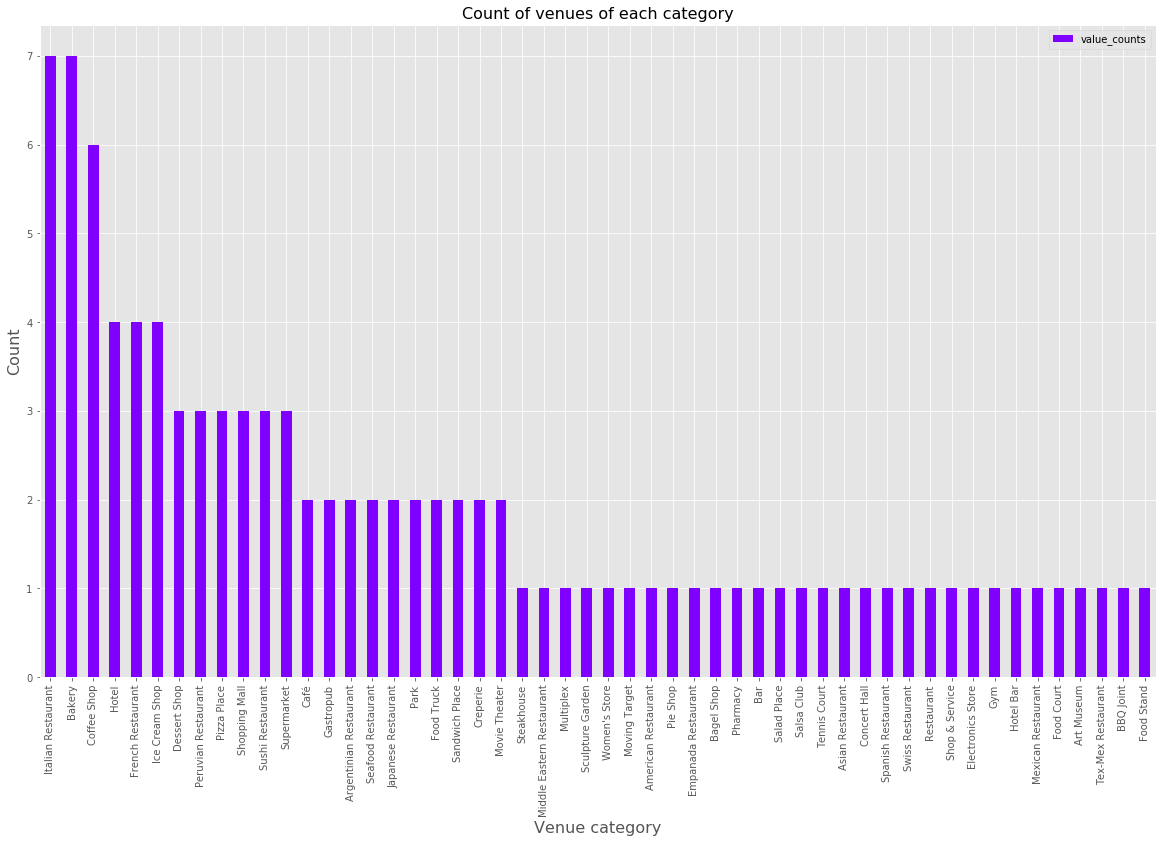

In [24]:
colors = cm.rainbow(np.linspace(0, 1, len(KSU_unique_categories_counts.index)))

KSU_unique_categories_counts.plot(kind='bar', figsize=(20,12), color= colors)


plt.xlabel("Venue category", fontsize = 16)
plt.ylabel("Count", fontsize = 16)
plt.title("Count of venues of each category", fontsize = 16)

plt.show

### seperating the restaurants 

In [25]:

Restaurants= KSU_categories_df[KSU_categories_df['categories'].str.contains("Restaurant")]

Restaurants

,categories
2,Italian Restaurant
7,Peruvian Restaurant
12,French Restaurant
19,Italian Restaurant
28,Italian Restaurant
29,Italian Restaurant
31,Peruvian Restaurant
32,Argentinian Restaurant
33,Italian Restaurant
34,Japanese Restaurant


In [26]:
Res_counts= pd.DataFrame(Restaurants['categories'].value_counts())
Res_counts.rename(columns={'categories':'value_counts'} , 
                 inplace=True)
 

Res_counts.index.name ='Categories'
Res_counts.astype('int')
Res_counts.sum()

value_counts    32
dtype: int64

## filtering different similar words and putting similar categories together

In [27]:

shops = KSU_categories_df[KSU_categories_df['categories'].str.contains("Restaurant")]

KSU_shops_counts= pd.DataFrame(shops['categories'].value_counts())
KSU_shops_counts.rename(columns={'categories':'value_counts'} , 
                 inplace=True)
 

shops.index.name ='Categories'
KSU_shops_counts

,value_counts
Italian Restaurant,7
French Restaurant,4
Sushi Restaurant,3
Peruvian Restaurant,3
Argentinian Restaurant,2
Seafood Restaurant,2
Japanese Restaurant,2
Asian Restaurant,1
Mexican Restaurant,1
Tex-Mex Restaurant,1


## counting the number of Restaurants near downtown

In [28]:
coffee =KSU_categories_df[KSU_categories_df['categories'].str.contains("Restaurant")]


KSU_coffee_counts= pd.DataFrame(coffee['categories'].value_counts())
KSU_coffee_counts.rename(columns={'categories':'value_counts'} , 
                 inplace=True)
 

coffee.index.name ='Categories'
KSU_coffee_counts



cafe =KSU_categories_df[KSU_categories_df['categories'].str.contains("Restorante")]


KSU_cafe_counts= pd.DataFrame(cafe['categories'].value_counts())
KSU_cafe_counts.rename(columns={'categories':'value_counts'} , 
                 inplace=True)
 

cafe.index.name ='Categories'
KSU_cafe_counts

frames = [KSU_cafe_counts, KSU_coffee_counts]

coffee_shops = pd.concat(frames)
coffee_shops

,value_counts
Italian Restaurant,7
French Restaurant,4
Sushi Restaurant,3
Peruvian Restaurant,3
Argentinian Restaurant,2
Seafood Restaurant,2
Japanese Restaurant,2
Asian Restaurant,1
Mexican Restaurant,1
Tex-Mex Restaurant,1


In [29]:
coffee_shops.sum()

value_counts    32
dtype: int64

## counting the number of Coffee shop or similar near downtown

In [30]:

shops = KSU_categories_df[KSU_categories_df['categories'].str.contains("Shop")]

shops_counts= pd.DataFrame(shops['categories'].value_counts())
shops_counts.rename(columns={'categories':'value_counts'} , 
                 inplace=True)
 

shops.index.name ='Categories'
shops_counts

,value_counts
Coffee Shop,6
Ice Cream Shop,4
Dessert Shop,3
Shopping Mall,3
Bagel Shop,1
Pie Shop,1
Shop & Service,1


In [31]:
KSU_shops=shops_counts.drop(['Shop & Service','Bagel Shop','Shopping Mall','Pie Shop'])
KSU_shops

,value_counts
Coffee Shop,6
Ice Cream Shop,4
Dessert Shop,3


In [32]:

KSU_shops.sum()

value_counts    13
dtype: int64

### The results are 32 restaurants of different cousines and 13 coffee shops or similar in downtown


# Quito, Ecuador (Centro Historico) - OLD TOWN

In [33]:
address = 'Quito, Ecuador'

geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Quito -Centro Historico are {}, {}.'.format(latitude, longitude))

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: DeprecationWarning: Using Nominatim with the default "geopy/1.18.1" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  app.launch_new_instance()


The geograpical coordinate of Quito -Centro Historico are -0.2201641, -78.5123274.


In [34]:
IMU_LATITUDE = -0.2201641
IMU_LONGITUDE = -78.5123274


## IMPORTING FOLIUM MAP OF THE LOCATION OF OLD TOWN

In [35]:
url2 = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(CLIENT_ID, 
                                                                        CLIENT_SECRET, 
                                                                        VERSION, 
                                                                        IMU_LATITUDE, 
                                                                        IMU_LONGITUDE, 
                                                                        radius,
                                                                        limit)
                                                            
            

In [36]:
results2= requests.get(url2).json()
results2

{'meta': {'code': 200, 'requestId': '5f1852afd031031d4d16e1b8'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Centro Histórico',
  'headerFullLocation': 'Centro Histórico, Quito',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 88,
  'suggestedBounds': {'ne': {'lat': -0.202164081999982,
    'lng': -78.49436085745107},
   'sw': {'lat': -0.238164118000018, 'lng': -78.53029394254894}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4e3b359d483b04e17a78b467',
       'name': 'Centro Cultural Metropolitano',
       'location': {'address': 'Garcia Moreno',
        'crossStreet': 'Espejo',
        'lat': -0.2201584571344043,
        'lng': -78.51309136971402,
        '

In [37]:
imu_venues = results2['response']['groups'][0]['items']
    
imu_nearby_venues = json_normalize(imu_venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
imu_nearby_venues =imu_nearby_venues.loc[:, filtered_columns]

# filter the category for each row
imu_nearby_venues['venue.categories'] = imu_nearby_venues.apply(get_category_type, axis=1)

# clean columns
imu_nearby_venues.columns = [col.split(".")[-1] for col in imu_nearby_venues.columns]

imu_nearby_venues

,name,categories,lat,lng
0,Centro Cultural Metropolitano,Art Gallery,-0.220158,-78.513091
1,La Compañía de Jesus,Church,-0.221108,-78.513593
2,Catedral Metropolitana,Historic Site,-0.220239,-78.512341
3,Plaza Grande,Plaza,-0.220327,-78.512163
4,Plaza San Francisco,Plaza,-0.220752,-78.514874
5,Casa Gangotena,Hotel,-0.221242,-78.515442
6,Iglesia De Santo domingo,Church,-0.223416,-78.512867
7,Hotel Plaza Grande,Hotel,-0.219590,-78.512091
8,Teatro Sucre,Theater,-0.218782,-78.508710
9,Café Plaza Grande,Breakfast Spot,-0.219723,-78.512227


In [38]:
locations_imu = imu_nearby_venues[['lat', 'lng']]
locationlist_imu = locations_imu.values.tolist()
len(locationlist_imu)

88

In [39]:
imu_categories= imu_nearby_venues['categories']
imu_categories_df = pd.DataFrame(imu_categories)
imu_categories_df

,categories
0,Art Gallery
1,Church
2,Historic Site
3,Plaza
4,Plaza
5,Hotel
6,Church
7,Hotel
8,Theater
9,Breakfast Spot


In [40]:
Imu_categories=pd.DataFrame(imu_categories_df.categories.unique())
Imu_categories_counts= imu_nearby_venues["categories"].value_counts


In [41]:
Imu_categories_counts



imu_categories_counts=pd.DataFrame(imu_nearby_venues['categories'].value_counts())
imu_categories_counts.rename(columns={'categories':'value_counts'} , 
                 inplace=True)
 

imu_categories_counts.index.name ='Categories'
imu_categories_counts

,value_counts
Categories,
Restaurant,11
Hotel,8
Plaza,5
Church,4
Park,4
History Museum,4
Historic Site,3
Coffee Shop,3
Diner,3


In [42]:
# set number of clusters
kclusters = 3

# run k-means clustering
kmeansOLD = KMeans(n_clusters=kclusters, random_state=0).fit(locationlist_imu)

# check cluster labels generated for each row in the dataframe
kmeansOLD.labels_


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 2, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 0, 0, 0, 1, 1, 2, 1, 1, 1,
       2, 2, 2, 1, 1, 2, 0, 1, 1, 1, 2, 0, 2, 1, 1, 0, 0, 1, 1, 2, 1, 1,
       1, 0, 1, 2, 0, 2, 2, 0, 1, 0, 0, 1, 0, 0, 1, 2, 1, 2, 2, 2, 1, 2],
      dtype=int32)

In [43]:
locationsOLD_clusters = np.column_stack((locationlist_imu, kmeansOLD.labels_))
#locationsOLD_clusters

In [44]:
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# create map
map_clusters_imu = folium.Map(location=[IMU_LATITUDE, IMU_LONGITUDE], zoom_start=14)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
#colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
colors_array = cm.gnuplot(np.linspace(0, 1, len(ys)))      #palette of colors
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []

for point in range(0, len(locationlist_imu)):
    location = np.append(locationsOLD_clusters[point][0],locationsOLD_clusters[point][1])
    cluster = int(locationsOLD_clusters[point][2])
    label = folium.Popup(str(imu_nearby_venues['name'][point]) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        location,
        radius=6,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.6,
    ).add_to(map_clusters_imu) 
map_clusters_imu

### PLOTTING THE CATEGORIAL DATAFRAME INTO A BAR CHART (OLD TOWN)

Text(0, 0.5, 'number of venues')

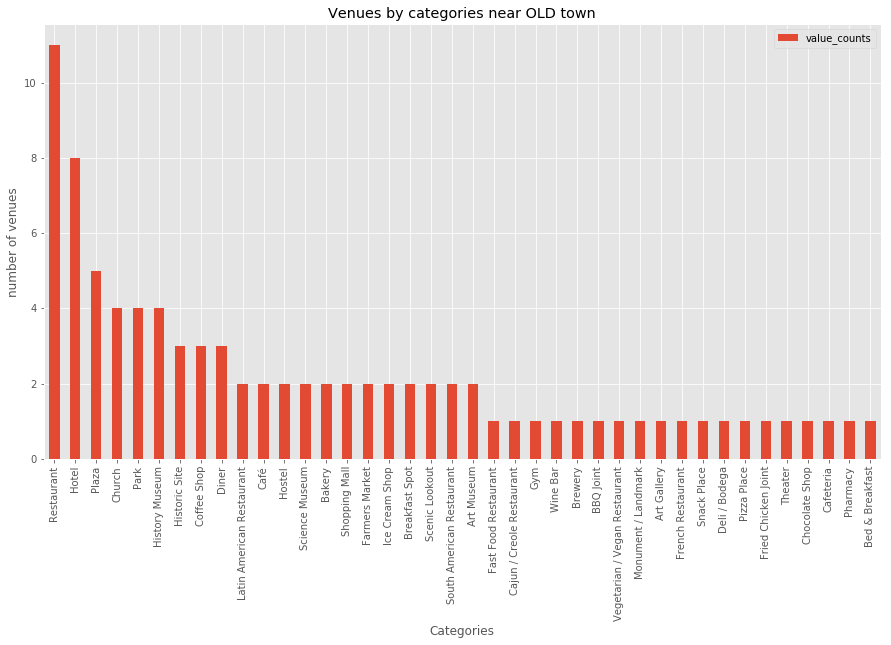

In [45]:
imu_categories_counts.plot(kind='bar', figsize=(15,8))
plt.title('Venues by categories near OLD town')
plt.xlabel('Categories')
plt.ylabel('number of venues')


we can see similar categorries seperated such as (coffe shops and cafes) so we will be puttinng them in one data frame together to count them 

In [46]:
IMUcoffee =imu_categories_df[imu_categories_df['categories'].str.contains("Coffee")]


IMU_coffee_counts= pd.DataFrame(IMUcoffee['categories'].value_counts())
IMU_coffee_counts.rename(columns={'categories':'value_counts'} , 
                 inplace=True)
 

IMUcoffee.index.name ='Categories'
IMU_coffee_counts



IMUcafe =imu_categories_df[imu_categories_df['categories'].str.contains("Café")]


IMU_cafe_counts= pd.DataFrame(IMUcafe['categories'].value_counts())
IMU_cafe_counts.rename(columns={'categories':'value_counts'} , 
                 inplace=True)
 

IMUcafe.index.name ='Categories'
IMU_cafe_counts

IMUframes = [IMU_cafe_counts, IMU_coffee_counts]

IMU_coffee_shops = pd.concat(IMUframes)
IMU_coffee_shops

,value_counts
Café,2
Coffee Shop,3


In [47]:
IMU_coffee_shops.sum()

value_counts    5
dtype: int64

In [48]:

imu_shops = imu_categories_df[imu_categories_df['categories'].str.contains("Shop")]

imu_shops_counts= pd.DataFrame(imu_shops['categories'].value_counts())
imu_shops_counts.rename(columns={'categories':'value_counts'} , 
                 inplace=True)
 

imu_shops.index.name ='Categories'
imu_shops_counts


,value_counts
Coffee Shop,3
Shopping Mall,2
Ice Cream Shop,2
Chocolate Shop,1


In [49]:
dessert_imu=imu_shops_counts.drop(['Shopping Mall'])
dessert_imu

,value_counts
Coffee Shop,3
Ice Cream Shop,2
Chocolate Shop,1


In [50]:
dessert_imu.sum()

value_counts    6
dtype: int64

##### we have 16 dessert related shops near IMAMU 

In [51]:

Restaurants_imu= imu_categories_df[imu_categories_df['categories'].str.contains("Restaurant")]

Restaurants_imu


imu_Res_counts= pd.DataFrame(Restaurants_imu['categories'].value_counts())
imu_Res_counts.rename(columns={'categories':'value_counts'} , 
                 inplace=True)
 

imu_Res_counts.index.name ='Categories'
imu_Res_counts

,value_counts
Categories,
Restaurant,11
South American Restaurant,2
Latin American Restaurant,2
Fast Food Restaurant,1
Vegetarian / Vegan Restaurant,1
French Restaurant,1
Cajun / Creole Restaurant,1


In [52]:
imu_Res_counts['value_counts'].astype('int')
imu_Res_counts.sum()

value_counts    19
dtype: int64

### The results are 19 restaurants of different cousines and 6 coffee shops or similar in Quito - OLD TOWN

# conclusion 

### we can see that opening a cafe in Quito - Old Town is a better option according to the high number of coffee shops in downtown
### Also the high presence of hotels, historic sites, museums in the OLD town suggest high numbers of visitors with few coffee shop options, making this a great business opportunity.